# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Цель проекта - выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости. 

Для этого нам предстоит изучить имеющиеся исходные данные, проверить таблицу на наличие пропусков, соответствия типа данных и выявить неявные дубли. Затем необходимо проверить данные на наличие аномальных и редких значений и избавиться от них. Затем добавить в в таблицу столбцы со значениями, которые нам понадобятся в исследовании, например, цена одного квадратного метра, 
тип этажа квартиры, расстояние в км до центра города и т.д.

На этапе исследования с помощь графиков изучим содержание каждого столбца, рассчитаем необходимые параметры, такие как скорость продажи квартиры и приступаем к выявлению факторов, влияющих на стоимость квартиры. С помощью диаграмм и коэффициента корреляции изучим такие параметры как общая площадь, количество комнат, день появления объявления и т.д. Рассчитаем необходимые новые параметры такие как населенные пункты по количеству объявлений и среднюю цену каждого километра. Выявленные закономерности и факторы влияния отразим в выводе.  


### Откройте файл с данными и изучите общую информацию. 

In [1]:
#Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt

#Чтение файла и разделением колонок с помощью табуляции 
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

#Вывод первых 20 строк датафрейма для ознакомления
data.head(20)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


***Вывод***

В датафрейме встречаются пропуски по столбцам, например столбец 'is_apartment' практически полностью состоит из NaN.

In [2]:
#приведение наименования столбца к единому регистру
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace = True )

In [3]:
#Вывод общей информации о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

***Вывод***
Метод info() подтверждает, что полностью заполненных столбцов всего 8 из 21.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], 

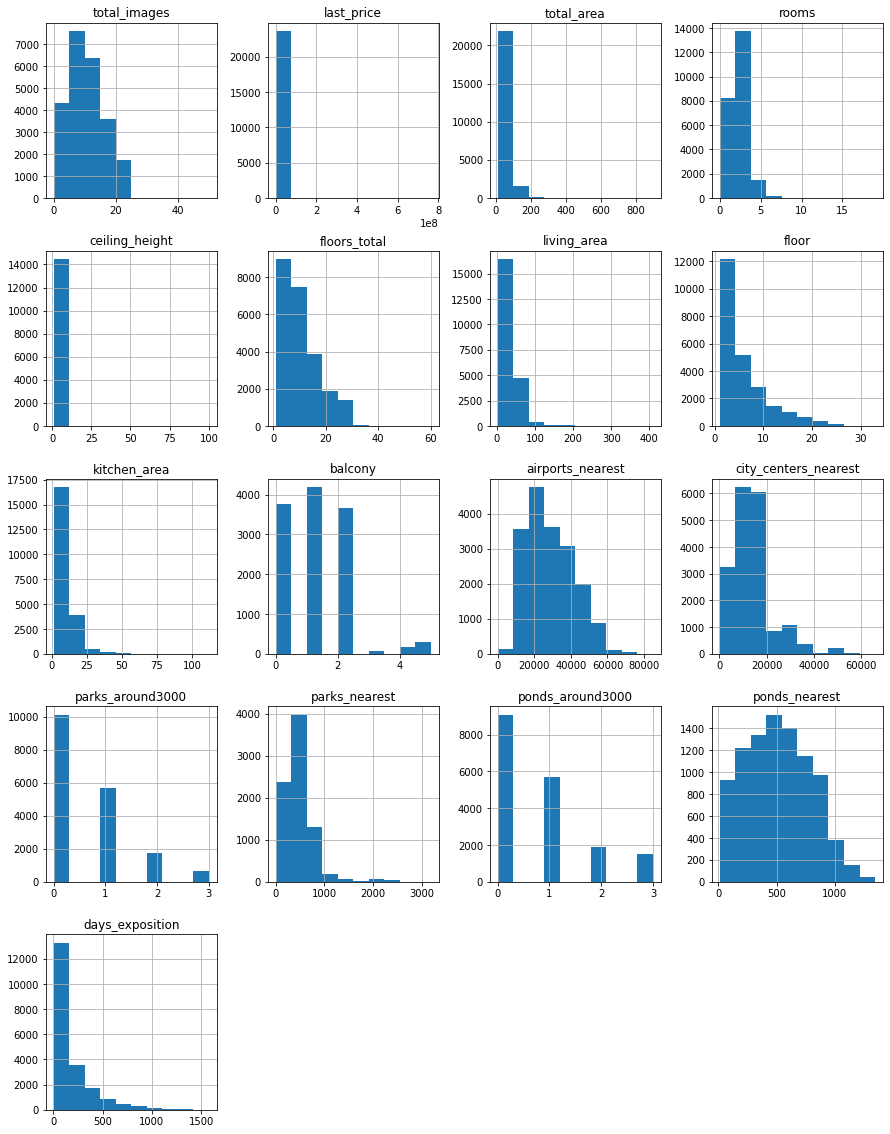

In [4]:
#Постройка гистограмм для всех числовых столбцов
data.hist(figsize=(15,20))

**Вывод**

Гистограммы по столбцам 'last_price','ceiling_height' имнют одинаковый вид - один столбец. В гистограмме по 'balcony' встречаются значения о 2,3 и 4 балконах в квартире. 

### Предобработка данных

In [5]:
#Вывод пропущенных значений для каждого столбца

data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

***Вывод***

Можно заменить пропущенные значения в следующих столбцах: 

**'balcony'**(11519 пропусков)- если не указанно количество балконов, то скорей всего их нет, пропуски можно заменить на 0  

**parks_around3000** (15620) и **ponds_around3000**(5518 пропусков) - мы не можем заменить пропуски в столбце количество парков без дополнительных данных, но мы можем заменить на 0 пропуски в столбце расстояние до ближайшего парка, там где стоит 0 в столбце 'ponds_around3000'. Тоже самое можно сделать со столбцами **parks_nearest** и **ponds_nearest** 

**is_apartment** (20924 пропусков) - если не указанно является ли объект апартаментами, то скорей всего он ими не является, пропуски можно заменить на значение False

**locality_name** (49 пропусков) и **floors_total**(86 пропусков) - в данных столбцах незначительные пропуски и сами мы не можем их заменить, т.к. не можем знать ни название населенного пункта, ни количество этажей в доме. Эти пропуски можно удалить 

Заполнить пропуски в столбцах с расстоянием до центра города и до аэропорта без дополнительных данных и уточнений не получится. Так же как и пропуски в столбцах с количеством дней объявления (возможно техническая ошибка), с данными по площади кухни и жилой площади и высотой потолков. 

Таким образом мы мы уберем из датафрейма самые большие пропуски

In [6]:
#Замена пропущенных значений в столбце 'balcony' на 0

data['balcony'] = data['balcony'].fillna(0)

#Замена пропущенных значений в столбце 'parks_around3000' на 0


#Замена пропущенных значений в столбце 'parks_nearest' на 0, там где значение в столбце 'parks_around3000' равно 0

data.loc[(data['parks_around3000']== 0), ('parks_around3000', 'parks_nearest')] = 0

##Замена пропущенных значений в столбце 'ponds_around3000' на 0, там где значение в столбце 'ponds_around3000' равно 0

data.loc[(data['ponds_around3000']== 0), ('ponds_around3000', 'ponds_nearest')] = 0

#Замена пропущенных значений в столбце 'is_apartment' на False

data['is_apartment'] = data['is_apartment'].fillna(False)

#Удаление пропусков в столбце 'locality_name'
data = data.dropna(subset=['locality_name'])

#Удаление пропусков в столбце 'floors_total'
data = data.dropna(subset=['floors_total'])

In [7]:
#Выводим оставшиеся пропуски
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9084
floors_total               0
living_area             1865
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2222
balcony                    0
locality_name              0
airports_nearest        5524
city_centers_nearest    5501
parks_around3000        5500
parks_nearest           5500
ponds_around3000        5500
ponds_nearest           5500
days_exposition         3171
dtype: int64

**Вывод**

Заполнить пропуски в столбцах с расстоянием до центра города и до аэрапорта без дополнительных данных и уточнений не получится. Так же как и пропуски в столбцах с количеством дней объявления, с данными по площади кухни и жилой площади. Количество этажей и название населенного пункта мы не можем сами придумать и таких пропусков минимальное значение 

Таким образом мы убрали из датафрейма самые большие пропуски

In [8]:
#Вывод датафрейма для установления столбцов, где необходтио поменять тип данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

**Изменение типов данных**

Тип столбца 'first_day_exposition' object, необходимо заменить на datetime, т.к. в этом столбце указан день публикации объявления. Также можно заменить на int64 значение в столбцах в которых по определению не может быть вещественного числа, например 'balcony' и 'floors_total'            

In [9]:
#Замена типа данных в столбце 'first_day_exposition'
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

#Замена типов данных в столбцах 'balcony' и 'floors_total' 

data['balcony'] = data['balcony'].astype('int')

data['floors_total'] = data['floors_total'].astype('int')

In [10]:
#Вывод датафрейма после замены типа данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

**Устранение неявных дублей в названиях населенных пунктов**

In [11]:
#Вывод уникальных значений в столбце 'locality_name'
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

**Вывод**

В столбце имеются неявные дубликаты. В названиях есть отличия "е" и "ё". Также есть разные обозначения одного и погоже типа населенного пункта, например "посёлок городского типа" и "городской посёлок".

In [12]:
#Замена буквы "ё" на "е"

data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

#Приведения к единоиу варианту названия типа населенного пункта "городской поселок" на "поселок городского типа"

data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')


In [13]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары',
       'поселок городского типа Янино-1', 'поселок Парголово',
       'поселок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посел

**Вывод**

У части населенных пунктов отсутствуют наименования типа, но без дополнительных данных уточнить это невозможно

**Поиск аномальных значений во всех столбцах**

In [14]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,14481.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,18065.000000,18065.000000,18065.000000,18065.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.771283,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.611569,217.376363,0.769499,259.245170,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,1.261983,6.594823,22.045359,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.802088,330.815071,0.938669,325.295565,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,0.000000,0.000000,0.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,0.000000,1.000000,16.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,417.000000,1.000000,503.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,2984.000000,3.000000,1344.000000,1580.000000


В столбце 'last_price' слишком большие значения, можно попробовать посмотреть значения и определить на какое число можно сократить значение в столбцах


In [15]:
#Вывод уникальных значений столбцв 'last_price'
data['last_price'].sort_values()

8793         12190.0
17456       430000.0
14911       430000.0
16274       440000.0
9581        450000.0
            ...     
15651    300000000.0
1436     330000000.0
14706    401300000.0
19540    420000000.0
12971    763000000.0
Name: last_price, Length: 23565, dtype: float64

Можно поделить на 1000

In [16]:
# Уменьшение значения на 1000
data['last_price']=data['last_price']/1000

In [17]:
display(data['last_price'].describe())

count     23565.000000
mean       6540.058260
std       10910.934722
min          12.190000
25%        3400.000000
50%        4646.000000
75%        6790.000000
max      763000.000000
Name: last_price, dtype: float64

In [18]:
#Вывод уникальных значений в столбце'balcony'
data['balcony'].unique()

array([0, 2, 1, 5, 4, 3])

В столбце 'balcony' имеются явные аномалии, количество балконов редко превышает значение более двух. 2 балкона уже большая редкость. Убираем строки со значением более 3 балкона

In [19]:
#Удаление аномалий и редких значений в столбце 'balcony'
data = data.query('balcony <=3')

In [20]:
#вывод числового описания данных
display(data['rooms'].describe())

count    23079.000000
mean         2.057888
std          1.078846
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

В столбце 'rooms' минимальное значение 0, такое невозможно, либо это может быть студия. Максимальное значение 19, это маловероятный случай. Возможно это какие-то нежилые помещения.

<AxesSubplot:>

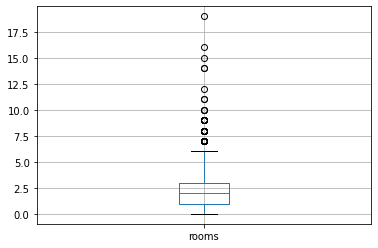

In [21]:
#Построим диаграмму размаха
data.boxplot(column='rooms')

По гистограмме выведенной ранее видно, что значений более 5 комнат значительно меньше по сравнению с остальными. По диаграмме размаха видно, что выбросы начинаются со значения 6 комнат. Таким образом можно убрать редкие и выбивающиеся значения больше 7

In [22]:
#Удаление аномалий и редких значений в столбце 'rooms'
data = data.query('rooms <=7')

In [23]:
#вывод числового описания данных
display(data['ceiling_height'].describe())

count    14087.000000
mean         2.759292
std          0.916958
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max         32.000000
Name: ceiling_height, dtype: float64

В столбце 'ceiling_height' максимальное значения высоты потолка 32, а минимальное 1. Потолки не могут быть меньше 2.5 метров по жилищным нормам, а потолки больше 5 метров редко встречаются. Значения потолков 25 метров и выше, возможно объяснить ошибкой и это скорей всего вещественного число 2.5

In [24]:
#Заменяем значение потолков 25 метров и выше 
data.loc[data['ceiling_height']>=25,'ceiling_height'] = data['ceiling_height']/10

#Удаление аномалий и редких значений в столбце 'ceiling_height'
data = data.loc[(data['ceiling_height']<=5) & (data['ceiling_height']>=2.5)| (data['ceiling_height'].isna())]

In [25]:
display(data['rooms'].describe())

count    22962.000000
mean         2.047078
std          1.034447
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

Рассмотрим столбец 'last_price'. Ранее мы его поделили на 1000

In [26]:
#вывод числового описания данных столбца 'last_price'
display(data['last_price'].describe())

count     22962.000000
mean       6409.099717
std       10366.866956
min          12.190000
25%        3400.000000
50%        4600.000000
75%        6700.000000
max      763000.000000
Name: last_price, dtype: float64

Большая часть значений лежит в диапазоне до 7.1 млн. рублей. Минимальная цена всего 12 тыс.рублей, а максимальная 330 млн. рублей. Среднее значение выше медианного почти на 2 млн. рублей, т.е. в имеются большие значения, которые влияют на среднее, но не влияют на медиану

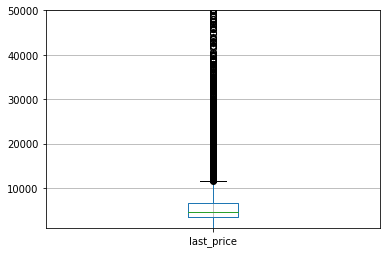

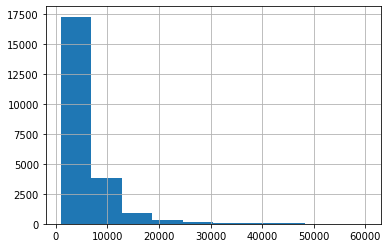

<AxesSubplot:>

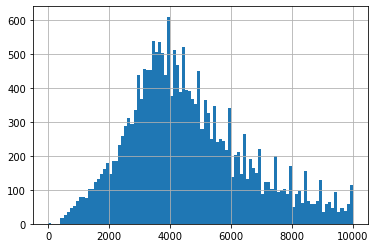

In [27]:
#Построим диаграмму размаха для столбца 'last_price'
plt.ylim(1000, 50000)
data.boxplot(column='last_price')
#Строим гистограмму для выяления количества больших значений
plt.show()
data['last_price'].hist(range=(1000, 60000))
#Строим гистограмму для выяления количества меньших значений
plt.show()
data['last_price'].hist(bins=100, range=(1, 10000))

Цена свыше 30 млн. рублей уже редко встречается, цена после 40 млн. рублей встречается ещё реже, а цена более 50 млн. рублей сливается с нулем, скорей всего далее уже единичные случаи. Для работы можно взять цену меньше 48 млн. рублей. Цена менее 1 млн. рублей также практически сливается с нулем, их тоже можно убрать

In [28]:
#Удаление аномалий и редких значений в столбце 'last_price'
data = data.query('last_price <=48000 and last_price >= 1000')

<AxesSubplot:>

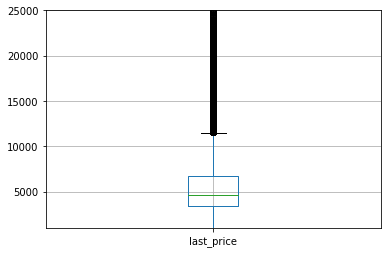

In [29]:
plt.ylim(1000, 25000)
data.boxplot(column='last_price')

In [30]:
#вывод числового описания данных столбца 'total_area'
display(data['total_area'].describe())

count    22606.000000
mean        58.665349
std         29.819586
min         12.000000
25%         40.000000
50%         51.300000
75%         68.500000
max        494.100000
Name: total_area, dtype: float64

Среднее значение выше медианного, значит, в показателях есть большие выбросы, которые сильно влияют на среднее, но не на медиану 

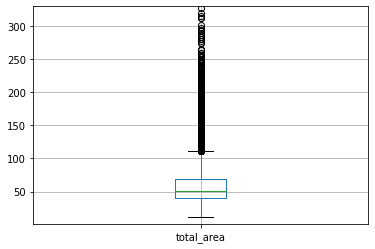

<AxesSubplot:>

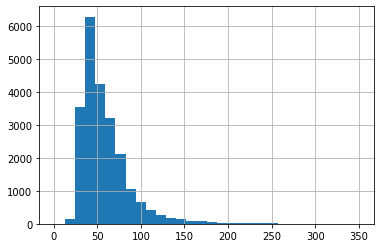

In [31]:
#Построим диаграмму размаха для столбца 'total_area'
plt.ylim(1, 330)
data.boxplot(column='total_area')
#Строим гистограмму для выяления выдиляющихся значений
plt.show()
data['total_area'].hist(bins = 30, range=(1, 350))

По диаграмме размаха видно, что в столбце 'total_area' имеются выбросы превышающие значения после 100 кв.м., редкие выбросы свыше 200 кв. м. По гистограмме видно, что значения после 180 кв.м очень редки, после 260 практически равны 0. Также имеются редкие значения с площадью до 15 кв.м.  

In [32]:
#Удаление аномалий и редких значений в столбце 'total_area'
data = data.query('total_area <=260 and total_area >=15')

In [33]:
#вывод числового описания данных столбца 'living_area'
display(data['living_area'].describe())

count    20809.00000
mean        33.33510
std         18.33381
min          2.00000
25%         18.50000
50%         30.00000
75%         42.00000
max        200.00000
Name: living_area, dtype: float64

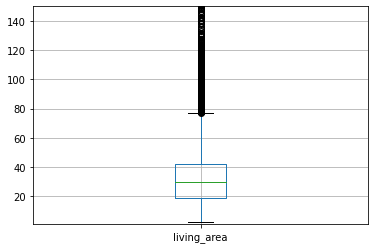

<AxesSubplot:>

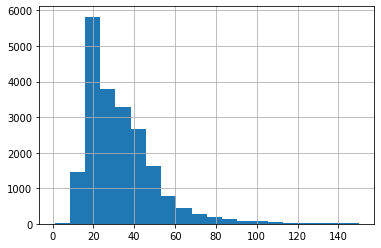

In [34]:
#Построим диаграмму размаха для столбцв 'living_area'
plt.ylim(1, 150)
data.boxplot(column='living_area')
#Строим гистограмму для выяления выдиляющихся значений
plt.show()
data['living_area'].hist(bins = 20, range=(1, 150))


По диаграмме размаха видно, что в столбце 'living_area' имеются выбросы превышающие значения после 80 кв.м. По гистограмме видно, что значения после 80 кв.м уменьшаются, а после 150 кв.м, практически равны 0. Также есть редкие значения с жилой площадью близкой к 0.

In [35]:
#Удаление аномалий и редких значений в столбце 'living_area'
data = data.loc[(data['living_area']<=130) & (data['living_area']>=5)| (data['living_area'].isna())]

In [36]:
display(data['kitchen_area'].describe())

count    20382.000000
mean        10.323891
std          5.177761
min          1.300000
25%          7.000000
50%          9.000000
75%         11.800000
max         75.000000
Name: kitchen_area, dtype: float64

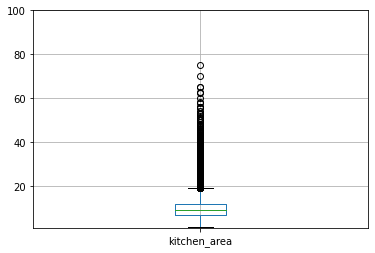

<AxesSubplot:>

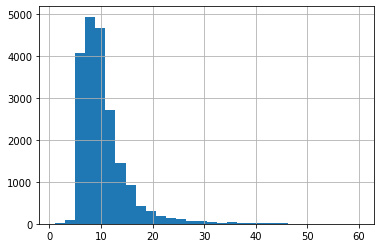

In [37]:
#Построим диаграмму размаха для столбцв 'living_area'
plt.ylim(1, 100)
data.boxplot(column='kitchen_area')
#Строим гистограмму для выяления выдиляющихся значений
plt.show()
data['kitchen_area'].hist(bins = 30, range=(1, 60))

По диаграмме размаха видно, что в столбце 'kitchen_area' имеются выбросы превышающие значения после 20 кв.м., есть отдельный выброс 60 кв. м. По гистограмме видно, что значения после 30 кв.м уменьшаются, а после 45 кв.м, практически равны 0. Также имеются редкие значения с площадью до 2 кв.м.

In [38]:
#Удаление аномалий и редких значений в столбце 'kitchen_area'         
data = data.loc[(data['kitchen_area']<=45) & (data['kitchen_area']>=2)|(data['kitchen_area'].isna())]

In [39]:
#вывод числового описания данных столбца 'floors_total'
display(data['floors_total'].describe())

count    22458.000000
mean        10.756880
std          6.601496
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Среднее значение выше медианного, значит в показателях есть большие выбросы, которые сильно влияют на среднее, но не на медиану 

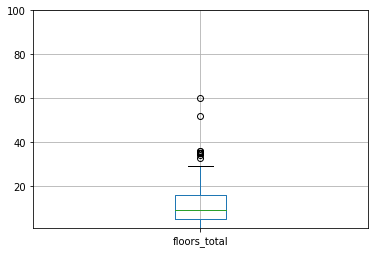

<AxesSubplot:>

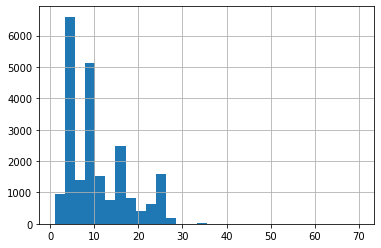

In [40]:
#Построим диаграмму размаха для столбцв 'floors_total'
plt.ylim(1, 100)
data.boxplot(column='floors_total')
#Строим гистограмму для выяления выдиляющихся значений
plt.show()
data['floors_total'].hist(bins = 30, range=(1, 70))

Значения после 30 практически равны 0, но есть редкие выбросы после 30 этажа

In [41]:
#Удаление аномалий и редких значений в столбце 'floors_total'
data = data.query('floors_total <=35')

In [42]:
#вывод числового описания данных столбца 'floor'
display(data['floor'].describe())

count    22454.000000
mean         5.885499
std          4.869602
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Среднее значение выше медианного, значит, в показателях есть выбросы, которые сильно влияют на среднее, но не на медиану. Учитывая, что в столбце 'floors_total' мы оставили значение меньше 35 этажей, а максимальное значение в столбце 'floor' - 33 этаж, то можно оставить столбец без изменений

In [43]:
#вывод числового описания данных столбца 'days_exposition'
display(data['days_exposition'].describe())

count    19506.000000
mean       179.457295
std        218.761328
min          1.000000
25%         44.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

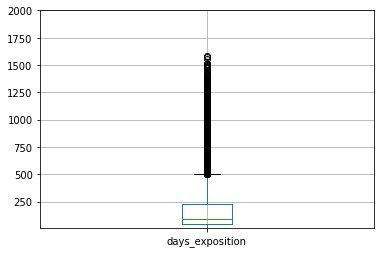

<AxesSubplot:>

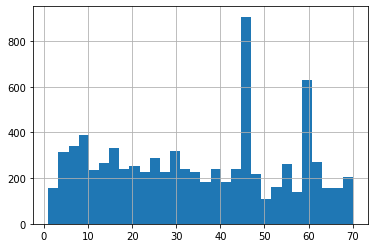

In [44]:
#Построим диаграмму размаха для столбцв 'days_exposition'
plt.ylim(10, 2000)
data.boxplot(column='days_exposition')
#Строим гистограмму для выяления выдиляющихся значений
plt.show()
data['days_exposition'].hist(bins = 30, range=(1, 70))


В диаграмме размаха выбросы в столбце 'days_exposition' начинаются после 500 дней. Среднее значение почти в 2 раза больше медианного, т.е. есть очень большие выбросы. В построенной ранее гистограмме заметно, что после 1200 дней, количество значений уменьшается и стремиться к нулю. Убираем значения больше 1200 дней

In [45]:
#Удаление аномалий и редких значений в столбце 'days_exposition'
data = data.loc[(data['days_exposition']<=1200) | (data['days_exposition'].isna())]

По построенным ранее гистограммам видно, что в столбцах 'parks_around3000' и 'ponds_around3000' имеется всего по 4 значения. Расстояние в столбце 'parks_nearest' стремиться к 0 после значения 2500 м. 

In [46]:
#Удаление аномалий в столбце 'parks_nearest'
data = data.loc[(data['parks_nearest']<=2500) | (data['parks_nearest'].isna())]

<AxesSubplot:>

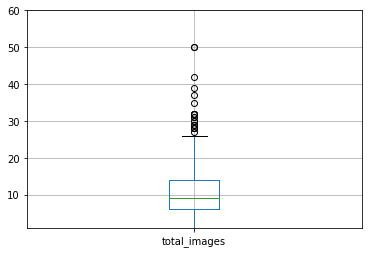

In [47]:
#Построим диаграмму размаха для столбца 'total_images'
plt.ylim(1, 60)
data.boxplot(column='total_images')

Выбросы начинаются после значения в 25 фотографий.

In [48]:
#Удаление аномалий и редких значений в столбце 'total_images'
data = data.query('total_images <=30')

In [49]:
#вывод числового описания данных столбца 'airports_nearest'
display(data['airports_nearest'].describe())

count    17197.000000
mean     28813.567541
std      12714.431660
min          0.000000
25%      18459.000000
50%      26781.000000
75%      37406.000000
max      84869.000000
Name: airports_nearest, dtype: float64

В столбце 'airports_nearest' минимальное значение равно 0, этого не может быть, т.к. жилая недвижимость не может находиться на территории аэропорта

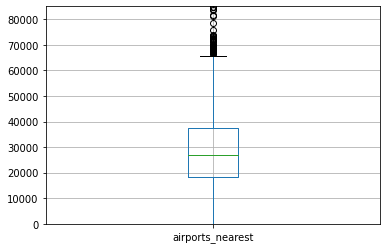

<AxesSubplot:>

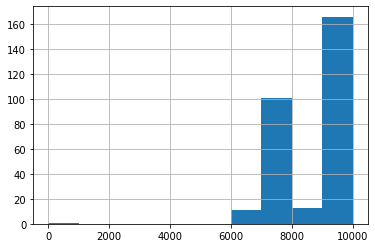

In [50]:
#Построим диаграмму размаха для столбца 'airports_nearest'
plt.ylim(0, 85000)
data.boxplot(column='airports_nearest')

#Строим гистограмму для выяления количества меньших значений
plt.show()
data['airports_nearest'].hist(range=(0, 10000))

В диаграмме размаха по столбцу 'airports_nearest' выбросы начинаются с после расстояния приблизительно 60000 м. В построенной ранее гистограмме также видно, что после 75000 м значения стремиться  к 0. В гистограмме для выявления меньших значений видны редкие аномалии в районе 0 значения. Можно убрать всё, что ниже 6000 м.

In [51]:
#Удаление аномалий и редких значений в столбце 'airports_nearest'
data = data.loc[(data['airports_nearest']<=75000) & (data['airports_nearest']>=6000)|(data['airports_nearest'].isna())]

In [52]:
#вывод числового описания данных столбца 'city_centers_nearest'
display(data['city_centers_nearest'].describe())

count    17207.000000
mean     14306.676469
std       8524.541949
min        181.000000
25%       9508.000000
50%      13205.000000
75%      16353.500000
max      61495.000000
Name: city_centers_nearest, dtype: float64

<AxesSubplot:>

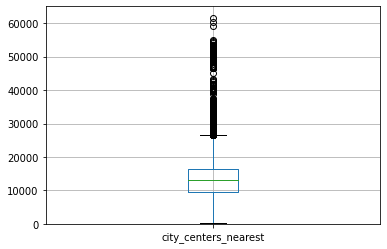

In [53]:
#Построим диаграмму размаха для столбца 'city_centers_nearest'
plt.ylim(0, 65000)
data.boxplot(column='city_centers_nearest')

По диаграмме размаха по столбцу 'city_centers_nearest' видно, что выбросы начинаются с расстояния в 25000 м. Также есть выбросы в районе 0, но их можно объяснить тем, что недвижимость находится непосредственно в центре города. По построенной ранее диаграмме видно, что после расстояния в 40000 м, значения становятся редкими, но есть небольшой всплеск на расстоянии 50000 м. После 60000 м. значения сравниваются с 0

In [54]:
#Удаление аномалий и редких значений в столбце 'city_centers_nearest'
data = data.loc[(data['city_centers_nearest']<=58000)|(data['city_centers_nearest'].isna())]

In [55]:
#Вывод дата фрейма после устранения редких и выбивающиеся значения во всех столбцах
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,22333.000000,22333.000000,22333.000000,22333.000000,13643.000000,22333.000000,20583.000000,22333.000000,20223.000000,22333.000000,17184.000000,17204.000000,17205.000000,17205.000000,17205.000000,17205.000000,19391.000000
mean,9.837818,5804.803412,57.556819,2.017553,2.717264,10.762190,32.843929,5.891819,10.237630,0.513366,28781.714618,14298.663799,0.595815,213.149550,0.755246,259.589480,174.452478
std,5.612337,4419.548646,26.042602,0.988224,0.258091,6.584547,16.913817,4.870804,4.824913,0.769611,12650.812493,8503.649016,0.788832,322.983616,0.926951,326.865676,205.455757
min,0.000000,1000.000000,15.000000,0.000000,2.500000,1.000000,5.000000,1.000000,2.000000,0.000000,6450.000000,181.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,3420.000000,40.000000,1.000000,2.505000,5.000000,18.500000,2.000000,7.000000,0.000000,18459.000000,9508.000000,0.000000,0.000000,0.000000,0.000000,44.000000
50%,9.000000,4600.000000,51.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26770.500000,13205.000000,0.000000,0.000000,0.000000,0.000000,94.000000
75%,14.000000,6596.000000,68.000000,3.000000,2.800000,16.000000,41.900000,8.000000,11.700000,1.000000,37364.000000,16338.750000,1.000000,413.000000,1.000000,505.000000,226.000000
max,30.000000,48000.000000,260.000000,7.000000,4.800000,35.000000,130.000000,33.000000,45.000000,3.000000,73827.000000,54926.000000,3.000000,2489.000000,3.000000,1344.000000,1200.000000


In [56]:
#Сброс индекса после удаления редких и выбивающиеся значения во всех столбцах
data = data.reset_index (drop=True)

In [57]:
#Вывод общей информации о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22333 entries, 0 to 22332
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22333 non-null  int64         
 1   last_price            22333 non-null  float64       
 2   total_area            22333 non-null  float64       
 3   first_day_exposition  22333 non-null  datetime64[ns]
 4   rooms                 22333 non-null  int64         
 5   ceiling_height        13643 non-null  float64       
 6   floors_total          22333 non-null  int64         
 7   living_area           20583 non-null  float64       
 8   floor                 22333 non-null  int64         
 9   is_apartment          22333 non-null  bool          
 10  studio                22333 non-null  bool          
 11  open_plan             22333 non-null  bool          
 12  kitchen_area          20223 non-null  float64       
 13  balcony         

In [58]:
# Расчитываем долю удаленных значений
deleted_values = (23699-22333)/23699 * 100
deleted_values

5.763956285075319

Доля удаленных сообщений составила 5,76%

### Посчитайте и добавьте в таблицу новые столбцы

In [59]:
#Расчет и добавление столбца с ценой одного квадратного метра и перевод его в числовой тип.
#Умножаем на 1000, т.к. ранее цену делили на 1000
data['price_per_square_meter'] = data['last_price']/data['total_area']
data['price_per_square_meter'] = (data['price_per_square_meter']*1000).astype('int')

In [60]:
#Расчет и добавление столбца с днем публикации объявления
data['week_day'] = data['first_day_exposition'].dt.weekday

In [61]:
#Расчет и добавление столбца с месяцем публикации объявления
data['month'] = data['first_day_exposition'].dt.month

In [62]:
#Расчет и добавление столбца с годом публикации объявления
data['year'] = data['first_day_exposition'].dt.year

In [63]:
#Создаем функцию одной строки для определения типа этажа квартиры
def apartment_floor_type(row):# создайте функцию categorize_purpose()purpose
       
        if row['floor'] == 1:
            return 'Первый'
        elif row['floor'] == row['floors_total']:
            return 'Последний'        
    
        return 'Другой'

#Создание столбца с типом этажа квартиры
data['apartment_floor_type'] = data.apply(apartment_floor_type, axis=1)    

In [64]:
#Расчет и добавление столбца с расстоянием до центра города в км.
data['distance_km_to_city_center'] = data['city_centers_nearest']/1000

In [65]:
# Вывод датафрейма после добавления новых столбцов
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,week_day,month,year,apartment_floor_type,distance_km_to_city_center
0,20,13000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,482.0,2.0,755.0,NaN,120370,3,3,2019,Другой,16.028
1,7,3350.0,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,0.0,0.0,0.0,81.0,82920,1,12,2018,Первый,18.603
2,10,5196.0,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,90.0,2.0,574.0,558.0,92785,3,8,2015,Другой,13.933
3,2,10000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,112.0,1.0,48.0,121.0,100000,1,6,2018,Другой,8.098
4,10,2890.0,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,NaN,NaN,NaN,55.0,95065,0,9,2018,Другой,NaN
5,6,3700.0,37.30,2017-11-02,1,NaN,26,10.60,6,False,...,0.0,0.0,0.0,155.0,99195,3,11,2017,Другой,19.143
6,5,7915.0,71.60,2019-04-18,2,NaN,24,NaN,22,False,...,0.0,0.0,0.0,NaN,110544,3,4,2019,Другой,11.634
7,20,2900.0,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,NaN,NaN,NaN,189.0,87454,2,5,2018,Другой,NaN
8,18,5400.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0.0,0.0,0.0,289.0,88524,6,2,2017,Другой,15.008
9,5,5050.0,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,310.0,2.0,553.0,137.0,127525,3,11,2017,Другой,13.878


**Вывод по предобработке** После заполнения пропусков, удаления неявных дубликатов и выбивающиеся значений изначальная таблица сократилась на 1366 строк, что составляет 5,76%. Также рассчитали и добавили в таблицу шесть столбцов с новыми параметрами, необходимыми для дальнейшего анализа  

### Проведите исследовательский анализ данных

**Общая площадь**

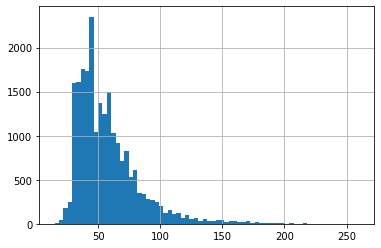

<AxesSubplot:>

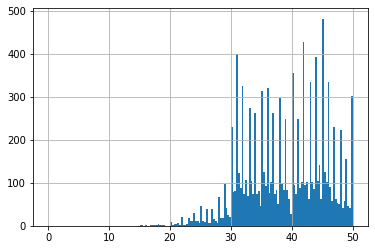

In [66]:
#Постройка гистограмм
data['total_area'].hist(bins=70)
plt.show()
data['total_area'].hist(bins=170, range=(0,50))

 **Вывод**

Большую часть объявлений (более 1000) занимают объявления с площадью менее от 30 кв.м до 50 кв.м., максимальное значение 45 кв.м. Количество объявлений с площадью более 75 кв.м постепенно снижается. После площади в 100 кв.м количество объявлений заметно падает, а после 150 кв.м стремится к 0   

**Жилая площадь**

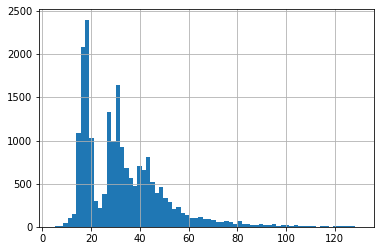

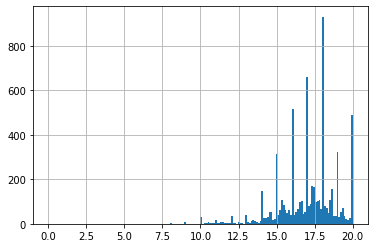

<AxesSubplot:>

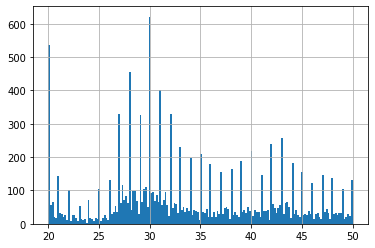

In [67]:
data['living_area'].hist(bins=70)
plt.show()
data['living_area'].hist(bins=170, range=(0,20))
plt.show()
data['living_area'].hist(bins=170, range=(20,50))

**Вывод**

Самое большое количество объявлений приходится на объявления, где жилая площадь составляет 18 кв.м. Также наблюдается увлечение объявлений с жилой площадью от 25 кв.м до 35 кв.м. Затем количество объявлений постепенно уменьшается, после 80 кв.м количество объявлений стремится к нулю

**Площадь кухни**

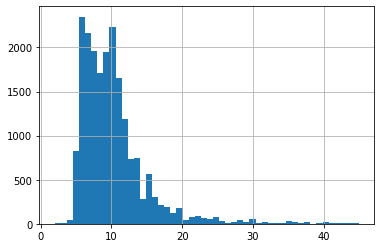

<AxesSubplot:>

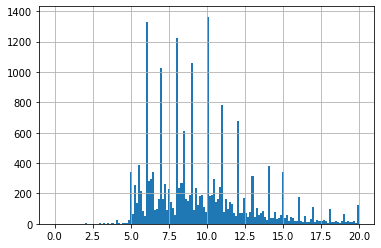

In [68]:
#Постройка гистограмм
data['kitchen_area'].hist(bins=50)
plt.show()
data['kitchen_area'].hist(bins=150, range=(0,20))

**Вывод**

Самое большое количество объявлений с площадью кухни 6 и 10 кв.м. После площади кухни в 12 кв.м количество объявлений постепенно снижается. После 20 кв.м количество объявлений стремится к 0

**Цена обекта**

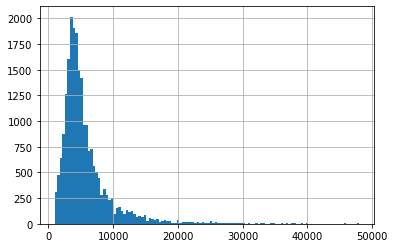

<AxesSubplot:>

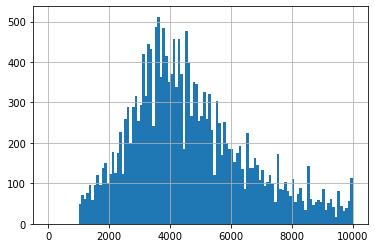

In [69]:
#Постройка гистограмм
data['last_price'].hist(bins=120)
plt.show()
data['last_price'].hist(bins=120, range=(0,10000))

**Вывод**

Самое большое количество объявлений в диапазоне от 3 млн.руб до 5 млн. руб. После 10 млн. руб количество объявлений снижается, после 20 млн. количество объявлений стремится к 0

**Количество комнат**

<AxesSubplot:>

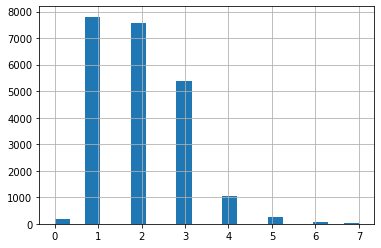

In [70]:
#Постройка гистограмм
data['rooms'].hist(bins=20)


**Вывод**

Самое большое количество объявлений приходится на однокомнатные квартиры, чуть меньше на двухкомнатные. Объявлений о трехкомнатных квартирах примерно на 2000 шт. меньше чем однокомнатных и двухкомнатных. Начиная с четырехкомнатных и далее,  количество объявлений постепенно снижается. Также есть объявления с 0 в графе количество комнат. Возможно это квартиры-студии


**Высота потолков**

<AxesSubplot:>

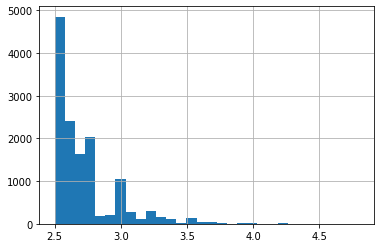

In [71]:
#Постройка гистограмм
data['ceiling_height'].hist(bins=30)

**Вывод**

Самое большое количество объявлений с высотой потолков 2.5 метра. Дальше заметно резкое снижение, до 2.75 метров, затем ещё одно снижение почти до 0 с резким всплеском на значении 3 метра

**Этаж квартиры**

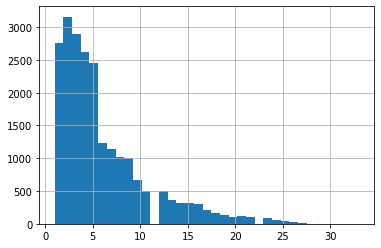

<AxesSubplot:>

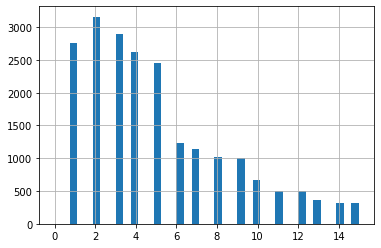

In [72]:
#Постройка гистограмм
data['floor'].hist(bins=35)
plt.show()
data['floor'].hist(bins=40, range=(0,15))


**Вывод**

Самое большое количество объявлений с 1 по 5 этаж (самое большое 2 этаж). Затем наблюдается постепенное снижение объявлений. После 25 этажа количество объявлений стремится к 0


**Тип этажа квартиры**

<AxesSubplot:>

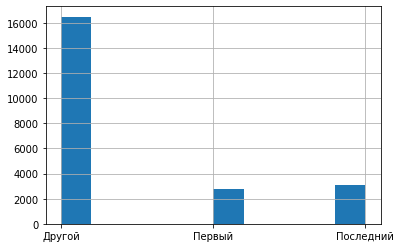

In [73]:
#Постройка гистограмм
data['apartment_floor_type'].hist()


**Вывод**

Самое большое количество объявлений в категории 'Другие'. Количество в категориях 'Первый' и 'Последний' примерно одинаковое. 'Последних' чуть больше

**Общее количество этажей в доме**

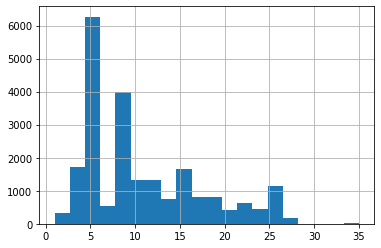

<AxesSubplot:>

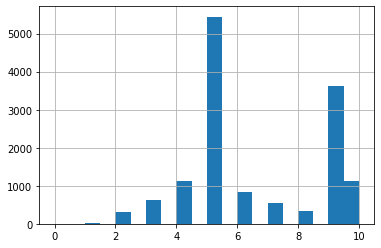

In [74]:
#Постройка гистограмм
data['floors_total'].hist(bins=20)
plt.show()
data['floors_total'].hist(bins=20, range = (0,10))

**Вывод**

Самое большое количество этажей в доме равно 5, затем идут дома в 9 этажей (самые распространенные по этажности типы домов в стране). Затем идет постепенное снижение с небольшим всплеском на 15 этажах. После 25 этажей количество объявлений минимально

**Расстояние до центра города**

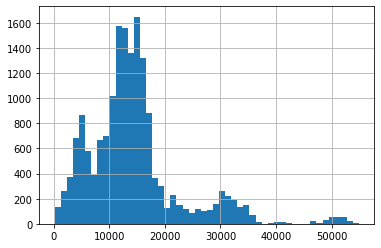

<AxesSubplot:>

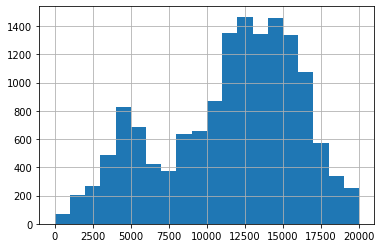

In [75]:
#Постройка гистограмм
data['city_centers_nearest'].hist(bins=50)
plt.show()
data['city_centers_nearest'].hist(bins=20, range = (0,20000))

**Вывод**

Самое большое количество объявлений о недвижимости находящейся на расстоянии 12 и 15 км. от центра Санкт-Петербурга. В целом основная масса объявлений о недвижимости находится в промежутке от 10 до 17 км. Это можно объяснить тем, что новые крупные микрорайоны как правило, строят на окраине городов, а также активно застраивается пригород. Также можно отметить большое количество в 5 км. от центра. После 17 км. отмечается снижение числа объявлений с небольшим всплеском в районе 30 км. Также можно отметить небольшое количество объявлений непосредственно в центре Санкт-Петербурга

**Расстояние до ближайшего аэропорт**

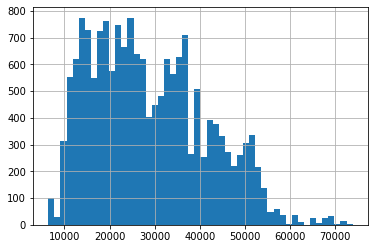

<AxesSubplot:>

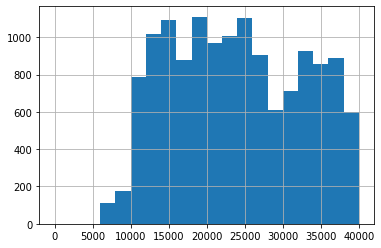

In [76]:
#Постройка гистограмм
data['airports_nearest'].hist(bins=50)
plt.show()
data['airports_nearest'].hist(bins=20, range = (0,40000))

**Вывод**

Основная масса объявлений о недвижимости находящейся на расстоянии 15, 20 и 25 км от ближайшего аэропорта. В целом основная масса объявлений о недвижимости находится в промежутке от 10 до 25 км. После 25 км. отмечается снижение числа объявлений с достаточно большим всплеском в районе 33-37 км. Это соотносится со всплеском объявлений в столбце расстояние до 'центра города'. Можно предположить, что это крупные населенный пункт, находящийся на расстоянии в приблизительно 30 км. от Санкт-Петербурга.

**Расстояние до ближайшего парка**

<AxesSubplot:>

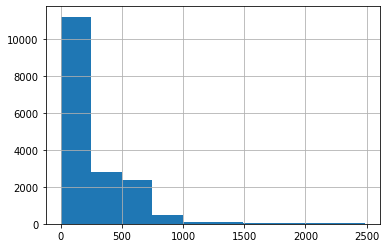

In [77]:
#Постройка гистограмм
data['parks_nearest'].hist(bins = 10)

**Вывод**

В большинстве объявлений указано отсутствие парков в близи объектов недвижимости. Из оставшихся объявлений чаще всего указано расстояние до ближайшего парка - до 500 м, после показателя в 750 м, заметно снижение количества объявлений с увеличением расстояния до ближайшего парка

**День публикации**


<AxesSubplot:>

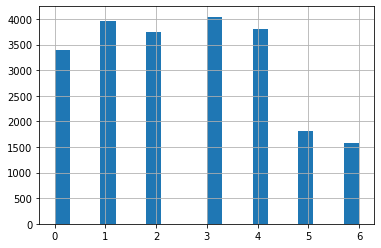

In [78]:
#Постройка гистограмм
data['week_day'].hist(bins = 20)

**Вывод**

Большинство объявлений публикуются в будни (чаще всего во вторник и четверг). В выходные объявления публикуются почти в 2 раза реже чем в будни

**Месяц публикации**

<AxesSubplot:>

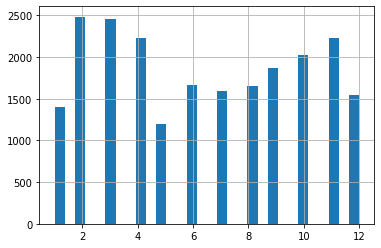

In [79]:
#Постройка гистограмм
data['month'].hist(bins = 30)

**Вывод**

Чаще всего объявления публикуют в феврале, затем в марте и апреле небольшой спад и резкий спад в мае, и затем небольшой рост летом. В летние месяцы количество объявлений практически не меняется. С начала осени от месяца к месяцу заметен рост числа объявлений, после чего резкий спад в декабре и январе. Спад объявлений в декабре и январе можно объяснить, новым годом. Перед новым годом как правила все стремиться закрыть сделки. Спад в мае можно объяснить майскими выходными, когда практически две недели никто не работает. Спад летом - период отпусков.   

**Как быстро продаются квартиры**

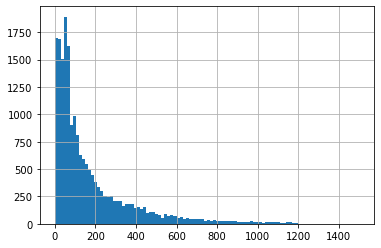

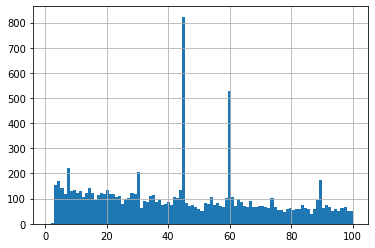

<AxesSubplot:>

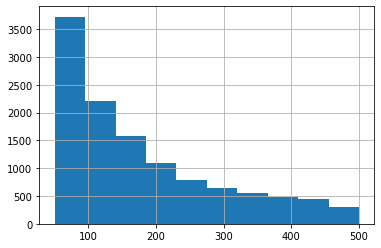

In [80]:
#Постройка гистограмм
data['days_exposition'].hist(bins=100, range=(0, 1500))
plt.show()
data['days_exposition'].hist(bins=100, range = (1,100))
plt.show()
data['days_exposition'].hist(range = (50,500))

<AxesSubplot:>

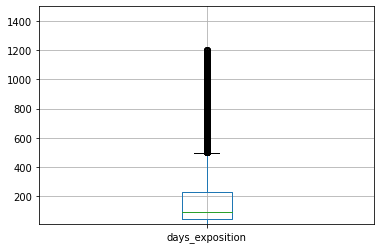

In [81]:
plt.ylim(10, 1500)
data.boxplot(column='days_exposition')

In [82]:
#Вывод числовых значений
display(data['days_exposition'].describe())

count    19391.000000
mean       174.452478
std        205.455757
min          1.000000
25%         44.000000
50%         94.000000
75%        226.000000
max       1200.000000
Name: days_exposition, dtype: float64

**Вывод**

Медианное значение равно 92, т.е. половина всех объявлений была размещена не более 94 дней. Среднее значение равно 174 дням. Это говорит о том, что имеются объявления, период размещения которых был очень большим, максимальное значение 1200 дней, т.е. 3 года. Минимальное значение 1 день, возможно объявления близкие к 1 были сняты в связи с какой-либо ошибкой и это не обязательно связанно с продажей. Заметны всплески 30, 45, 60, 90 и кажется 7 дней - всплески через ранее промежутки времени. Возможно, это какой-то технический сбой или правило. Учитывая это, при определении "быстрых продаж", я бы предложил ориентироваться на нижний квартиль(Q1), т.е первые 25% всех объявлений и считать такими продажами количество дней, которых меньше или равно 45. По гистограмме видно, что после всплеска на 90 днях идет резкое снижение до 250 дней, с последующим медленным затуханием. По диаграмме размаха выбросы начинаются после 500 дней. Учитывая это, при определении "необычно долгих продаж", я бы предложил ориентироваться на верхний квартиль(Q3) и считать такими продажами количество дней, которых больше или равно 230, т.е. последние 25% всех объявлений

**Выявление факторов больше всего влияющих на общую (полную) стоимость объекта**

**Площадь обекта**

0.7681870722378386

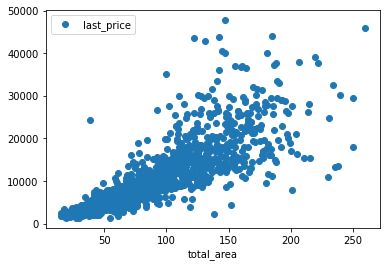

In [83]:
#Строим сводную таблицу для значений площади объекта и его цены
pivot_area_price = data.pivot_table(index = 'total_area', values = 'last_price')

#Строим диаграмму рассеяния 
pivot_area_price.plot(y = 'last_price', style = 'o')

#Считаем коэффициент корреляции Пирсона
data['total_area'].corr(data['last_price'])



**Вывод**

Коэффициент Пирсона для цены объекта и его площади составляет 0.768, т.е. значение близко к 1, значит, площадь объекта достаточно сильно влияет на его стоимость. Это же подтверждается диаграммой рассеяния. По диаграмме видно, что основные выбросы появляются с увеличением значений. Есть отдельные выбросы на небольших значениях цены и площади, это возможно объяснить, например географической близостью объекта к центру города, когда например небольшой объект площадью 40 кв., может продаваться за 25 млн. руб. и наоборот большие по площади объекты могут стоить до 10 млн. рублей, но находиться очень далеко от города

**Жилая площадь**

0.6610121779973902

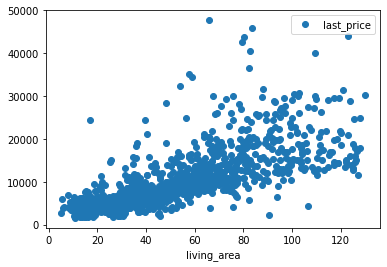

In [84]:
#Строим сводную таблицу для значений жилой площади объекта и его цены
pivot_living_price = data.pivot_table(index = 'living_area', values = 'last_price')

#Строим диаграмму рассеяния 
pivot_living_price.plot(y = 'last_price', style = 'o')

#Считаем коэффициент корреляции Пирсона
data['living_area'].corr(data['last_price'])

**Вывод**

Коэффициент Пирсона для цены объекта и жилой площади объекта составляет 0.661, значение чуть меньше, чем у общей площади, соответственно жилая площадь объекта влияет на его стоимость чуть меньше, чем общая. Диаграмма рассеяния для жилой площади в целом похожа на диаграмму рассеяния для общей площади, на ней даже видны тоже самые выбросы. Также на коэффициент могли повлиять пропуски в столбце 'living_area'

**Площадь кухни**

0.5784165241613705

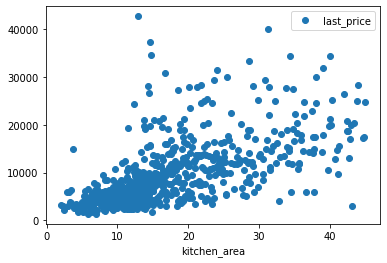

In [85]:
#Строим сводную таблицу для значений площади кухни объекта и его цены
pivot_kitchen_price = data.pivot_table(index = 'kitchen_area', values = 'last_price')

#Строим диаграмму рассеяния 
pivot_kitchen_price.plot(y = 'last_price', style = 'o')

#Считаем коэффициент корреляции Пирсона
data['kitchen_area'].corr(data['last_price'])

**Вывод**

Коэффициент Пирсона для цены объекта и площади кухни объекта составляет 0.578, значение еще меньше, чем у жилой площади, по сути, получаем среднею зависимость цены от площади кухни. По диаграмме рассеяния сильно корригируются значения при небольшой площади кухни, после значения в 20 кв.м зависимость ослабевает

**Количество комнат**

0.4739127984566231

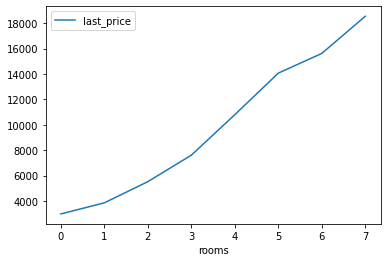

In [86]:
#Строим сводную таблицу для значений количество комнат в объекте и его цены
pivot_rooms_price = data.pivot_table(index = 'rooms', values = 'last_price')

#Строим диаграмму
pivot_rooms_price.plot()

#Считаем коэффициент корреляции Пирсона
data['rooms'].corr(data['last_price'])

**Вывод**

Коэффициент Пирсона для количества комнат в объекте и его цены составляет 0.474, что говорит о слабой зависимости цены объекта от количества комнат в нем. По графику видно, что цена в зависимости от количества комнат в целом возрастает, это можно объяснить тем, что чем больше комнат, тем соответственно больше общая площадь.


**Тип этажа**

,mean
apartment_floor_type,
Другой,6026.883459
Первый,4647.269681
Последний,5654.086828


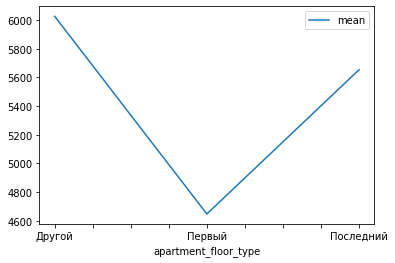

In [87]:
#Строим сводную таблицу для значений типа этажа объекта и его цены и рассчитываем средную цену для каждого типа этажа
pivot_floor_type_price = data.pivot_table(index = 'apartment_floor_type', values = 'last_price', aggfunc = ['mean'])

#Дабавляем столбец со средним значением и выводим результат
pivot_floor_type_price.columns = ['mean']
pivot_floor_type_price.plot()
pivot_floor_type_price


**Вывод**

По диаграмме видно, что самые дешевые объекты находятся на Первом этаже. Это же подтверждается значением цены объекта для данного типа. Средняя цена объекта расположенного на Последнем этаже почти на 20% выше средней цены объекта расположенного на Первом этаже. Стоимость объектов имеющих тип этажа Другие почти на 30% выше стоимости объектов на первом этаже. Таким образом Самые дешевые объекты расположены на Первом этаже, саме дорогие имеют тип этажа Другие, т.е. тип этажа влияет на стоимость объекта  

**Дата размещения. День**

-0.016088768385228533

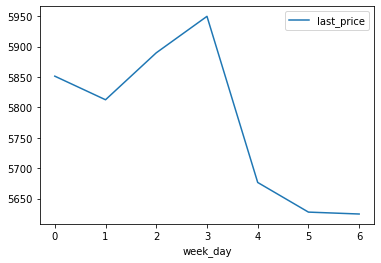

In [88]:
#Строим сводную таблицу для значений день размещения объявления и цены объекта
pivot_day_price = data.pivot_table(index = 'week_day', values = 'last_price')

#Строим диаграмму 
pivot_day_price.plot()

#Считаем коэффициент корреляции Пирсона
data['week_day'].corr(data['last_price'])

**Вывод**

Коэффициент Пирсона для цены объекта и дня размещения объявления составляет - 0.016, т.е. имеем очень слабую отрицательную корреляцию. Нельзя сделать вывод о какой-либо зависимости цены объекта от дня размещения объявления. Если сравнить с гистограммой по количеству объявлений в день недели, то можно заметить, что самая высокая цена выставляется в четверг, в день когда размещается больше всего объявлений, а на выходные приходится самая низкая цена, так же как и количество объявлений

**Дата размещения. Месяц**

-0.0019865837916757355

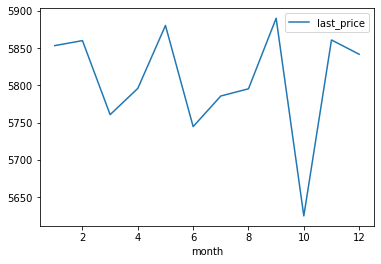

In [89]:
#Строим сводную таблицу для значений месяц размещения объявления и цены объекта
pivot_month_price = data.pivot_table(index = 'month', values = 'last_price')

#Строим диаграмму 
pivot_month_price.plot()

#Считаем коэффициент корреляции Пирсона
data['month'].corr(data['last_price'])

**Вывод**

Коэффициент Пирсона для цены объекта и месяца размещения объявления составляет - 0.002, т.е. коэффициент практически равен 0. Цена объекта и месяц размещения никак не связанны. Если сравнить с гистограммой по количеству объявлений в месяц, то можно заметить, что в мае, когда меньше всего объявлений, практически самые высокие цены, а в октябре наоборот - большое количество объявлений и просто провал по ценам. Возможно, это связанно с большим количеством объявлений о продаже загородной недвижимости и окончанием летнего сезона.

**Дата размещения. Год**

-0.031360041254205474

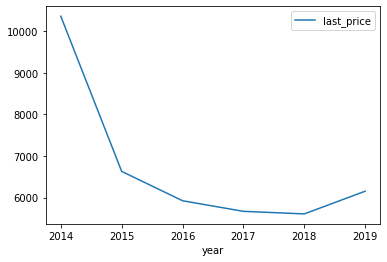

In [90]:
#Строим сводную таблицу для значений год размещения объявления и цены объекта
pivot_year_price = data.pivot_table(index = 'year', values = 'last_price')

#Строим диаграмму 
pivot_year_price.plot()

#Считаем коэффициент корреляции Пирсона
data['year'].corr(data['last_price'])

**Вывод**

Коэффициент Пирсона для цены объекта и года размещения объявления составляет - 0.031, т.е. имеем очень слабую отрицательную корреляцию. Нельзя сделать вывод о какой-либо зависимости цены объекта от года размещения объявления. По диаграмме можно заметить, что самые высокие цены были в 2014 году, потом последовал резкий спад с плавным снижением до 2018 года, после чего начался рост стоимости. Возможно в данных за 2014 год есть какие-то ошибки. либо в этот год был выставлен на продажу самый дорогой объект

**Средняя цена одного квадратного метра в 10 населённых пунктах**

In [91]:
#Строим сводную таблицу для значений наименование населенного пункта и цены одного квадратного метра и считаем количество объявлений и средную цену
pivot_table_locality = data.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean'])

#Добавляем в сводную таблицу столбцы 'count' и 'mean'
pivot_table_locality.columns = ['count', 'mean']

#Сортируем таблицу по убыванию количества объявлений в населенном пункте и сохраняем первые 10 значений
pivot_table_locality = pivot_table_locality.sort_values('count', ascending = False).head(10)
pivot_table_locality


,count,mean
locality_name,,
Санкт-Петербург,14881,111618.715409
поселок Мурино,537,85689.871508
поселок Шушары,430,78714.434884
Всеволожск,383,68836.939948
Пушкин,350,102465.528571
Колпино,327,75198.461774
поселок Парголово,325,90132.089231
Гатчина,295,68835.976271
деревня Кудрово,293,92688.402730


In [92]:
#Вывод самой высокой стоимости
pivot_table_locality[pivot_table_locality['mean']==pivot_table_locality['mean'].max()]


,count,mean
locality_name,,
Санкт-Петербург,14881,111618.715409


In [93]:
#Вывод самой низкой стоимости
pivot_table_locality[pivot_table_locality['mean']==pivot_table_locality['mean'].min()]

,count,mean
locality_name,,
Выборг,230,58843.052174


**Вывод**
Подавляющее большинство объявлений о продаже недвижимости в Санкт-Петербурге (14881), объявлений больше почти в 30 раз по сравнению с поселком Мурино (537), находящимся на 2 месте по количеству объявлений. Меньше всего объявлений в Топ 10 по количеству объявлений у Выборга (230). Тоже самое со стоимостью одного квадратного метра. В Санкт-Петербурге самая высокая средняя цена - 111618 руб, самая низкая в Топ 10 в Выборге - 58843 руб.   

**Средняя цена киломметра в Санкт-Петербурге** 

,price_per_square_meter
distance_km_to_city_center,
0,154143.985915
1,140661.072464
2,127512.044610
3,121439.063265
4,133870.966061
5,137953.201460
6,137377.534279
7,131633.289125
8,119277.540157


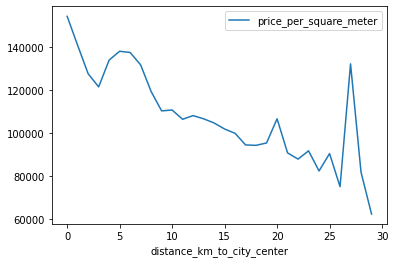

In [94]:
# заменяем пропуски в столбце 'distance_km_to_city_center', для этого заменяем пропуски на число которого не может быть в растоянии
data['distance_km_to_city_center'] = data['distance_km_to_city_center'].fillna(100000)

#Перевод значений в столбце 'distance_km_to_city_center' в тип 'int' для округления до целого числа значения км.
data['distance_km_to_city_center'] = data['distance_km_to_city_center'].astype('int')

#Создаем сводную таблицу по срезу значений Санкт-Петербург, за исключением значений добавленных для заполнения пропуска
pivot_table_km_to_city = data.query('locality_name == "Санкт-Петербург" and distance_km_to_city_center !=100000').pivot_table(index = 'distance_km_to_city_center', values = 'price_per_square_meter', aggfunc = 'mean')

#Постройка диаграммы
pivot_table_km_to_city.plot()

#Вывод сводной таблицы
pivot_table_km_to_city

**Вывод**

По диаграмме видно, что чем ближе расположены объекты к центру города, там выше цена кв. м. На расстоянии 2 и 3 км от центра города цена кв.м ниже чем на расстоянии от 4 до 7 км. Возможно, это как-то связанно с географическими особенностями. После 7 км цена за кв.м постепенно снижается по мере удаления, но есть несколько всплесков на 20,23 и 27 км. Цена недвижимости на 27 км сопоставима со стоимость кв.м. в центре Санкт-Петербурга. Возможно, предположить, что на этих расстояниях находится элитные населенные пункты. Можно предположить, что есть зависимость стоимость кв.м. от расстояния до центра города, но встречаются серьезные аномальные всплески, которые выбиваются из общей динамики

### Общий вывод

Нами проведен исследовательский анализ архива объявлений с сервиса Яндекс Недвижимость о продаже квартир в городе Санкт-Петербурге и прилагающих районах. На этапе предобработки данных было проанализировано содержание предоставленной таблицы, выявлены пропуски в столбцах и заменены, там, где это было возможным, на значения, минимально влияющие на последующие расчеты. Проанализированы типы данных и произведена замена типа данных на нужный тип в тех категориях, которые необходимы были для последующего анализа. Выявлены неявные дубликаты в названиях населенных пунктов - буква "е" и "ё" в названиях, а так же похожие типы названий "городской поселок" и "поселок городского типа". Эти дубли были приведены к единой форме. С помощью метода describe(), гистограмм и диаграмм размаха проанализированы данные по всем столбцам и устранены редкие и аномальные значения. В таблицу были добавлены столбцы с ценой одного квадратного метра, с денем, месяцем и годом публикации, определен тип этажа квартиры и расстояние до центра города.

Изучены следующие параметры:
**Общая площадь** - Чаще всего на продажу выставляют объекты с общей площадью от 30 кв.м до 50 кв.м., максимальное значение 45. кв.м. Затем общая площадь продаваемых объектом постепенно снижается. Рассчитав Коэффициент Пирсона для цены объекта и его площади (0.768), **установлена сильная зависимость** цены квартиры от её площади. На диаграмме рассеяния видны отдельные выбросы, но в целом видно, что цена увеличивается по мере увеличения общей площади квартиры;

**Жилая площадь** - Самые частые объявления о продаже квартир с жилой площадью в 18 кв.м. - скорей всего это однокомнатные квартиры. Также много объявлений с жилой площадью от 25 кв.м до 35 кв.м. Затем количество объявлений постепенно снижается. В целом можно наблюдать похожую динамику с общей площадью, что подтверждается коэффициентом Пирсона (0.661), но цена квартиры **чуть менее зависима** от размера жилой площади;

**Площади кухни** - Самые частые объявлений с площадью кухни 6 и 10 кв.м. После площади кухни в 12 кв.м количество объявлений постепенно снижается. Так же можно предположить, что это однокомнатные квартиры. В целом динамика также похожа на значения с общей и жилой площадью, но **показывает среднее влияние на цену**, чуть слабее, чем у предыдущих показателей. Коэффициент  Пирсона - 0.578;

**Количество комнат** - Как и предполагалось ранее самое большое количество объявлений это однокомнатные квартиры, чуть меньше объявлений на двухкомнатные. Затем с увеличением количества комнат, снижается количество объявлений. Коэффицент Пирсона (0.474) говорит о **слабой зависимости** цены объекта от количества комнат, но она есть, это можно объяснить тем что чем больше комнат, тем соответственно больше площадь;

**Типа этажа** - Самое большое количество объявлений в категории 'Другие' этажи, т.е. не первый и не последний этаж. Количество объявлений в категориях 'Первый' и 'Последний' примерно одинаковое. Самые дешевые объекты находятся на Первом этаже. Средняя цена объекта расположенного  на Последнем этаже почти на 20% выше средней цены объекта расположенного на Первом этаже. Стоимость объектов имеющих тип этажа Другие почти на 30% выше стоимости объектов на первом этаже. Таким образом, **тип этажа влияет на стоимость объекта**; 

**Даты размещения** - Коэффициент  Пирсона для дня, месяца и года составляет -0.016, -0.002 и -0.031, т.е. имеем очень слабую отрицательную корреляцию, значит, **дата публикации объявления не влияет на цену объекта**. Большинство объявлений публикуются в будни (чаще всего во вторник и четверг). В выходные объявления публикуются почти в 2 раза реже, чем в будни. Можно отметить, в мае, когда меньше всего объявлений, практически самые высокие цены, а в октябре наоборот - большое количество объявлений и просто провал по ценам. Возможно, это связанно с большим количеством объявлений о продаже загородной недвижимости и окончанием летнего сезона. Чаще всего объявления публикуют в феврале, затем в марте и апреле. Летом количество объявлений снижается, вероятно, в связи с периодом отпусков. Самые высокие цены были в 2014 году, потом последовал резкий спад с плавным снижением до 2018 года, после чего начался рост стоимости. Возможно в данных за 2014 год есть какие-то ошибки. либо в этот год был выставлен на продажу самый дорогой объект или сразу несколько объектов;

**Время продажи квартир** - Половина всех объявлений была размещена на сайте не более 94 дней. В среднем объявление находилось на сайте 174 дня. Можно сделать вывод, что имеются объявления, период размещения которых был очень большим, максимальное значение 1200 дней. Имеются объявления, находившиеся на сайте 1 день и чуть более, возможно это связано с какой-либо ошибкой в размещении объявления. Заметны всплески 30, 45, 60, 90 и кажется 7 дней - всплески через равные промежутки времени. Возможно, это какой-то технический сбой или какое либо правило сайта. Быстрыми продажами являются продажи количество дней, которых меньше или равно 45, необычно долгими продажами более 230 дней;

**Цена одного квадратного метра** - В Санкт-Петербурге самая высокая средняя цена - 111618 руб, самая низкая в Топ 10 в Выборге - 58843 руб.;

**Средняя цена километра** - Чем ближе расположены объекты к центру города, там выше цена кв. м. Самые высокие цены находятся в радиусе 1 км. до центра. На расстоянии 2 и 3 км от центра города цена кв.м ниже чем на расстоянии от 4 до 7 км. Возможно, это как-то связанно с географическими особенностями. После 7 км цена за кв.м постепенно снижается по мере удаления, но есть несколько всплесков на 20,23 и 27 км. Цена недвижимости на 27 км сопоставима со стоимость кв.м. в центре Санкт-Петербурга. Возможно, что на этих расстояниях находится элитные населенные пункты. Можно предположить, что **есть зависимость стоимость кв.м. от расстояния до центра города**.

Таким образом, после проведения исследовательского анализа архива объявлений о продаже квартир в городе Санкт-Петербурге, выявлены зависимости стоимости объектов недвижимости от площади объекта, типа этажа на котором расположен объект и от расстояния до центра города Санкт-Петербург. Самые дорогие объявления у квартир находящихся в радиусе 1 километра от центра Санкт-Петербурга, расположенных не на первом и не на последнем этаже дома и с высокой общей площадью. Также можно отметить Высокие цены на квартиры в элитных поселках.



**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод